In [1]:
import numpy as np
from numpy.linalg import det
import matplotlib.pyplot as plt
import sys
%matplotlib inline
np.random.seed(1010)

## Useful functions

In [2]:
def I_XY(X,Y):
    
    dim_X = X.ndim
    dim_Y = Y.ndim
    
    cov = np.cov(X,Y)
    if (dim_X == 1):
        det_sigma_X = cov[0,0]
    elif (dim_X > 1):
        det_sigma_X = np.linalg.det(cov[:dim_X,:dim_X])
    if (dim_Y == 1):
        det_sigma_Y = cov[dim_X,dim_X]
    elif (dim_Y > 1):
        det_sigma_Y = np.linalg.det(cov[dim_X:,dim_X:])
        
    I = np.log2((det_sigma_X*det_sigma_Y)/np.linalg.det(cov))
    
    return I

def I_XYZ(X,Y,Z):
    
    dim_X = X.ndim
    dim_Y = Y.ndim
    dim_Z = Z.ndim
    
    cov = np.cov(np.vstack((X,Y,Z)))
    if (dim_X == 1):
        det_sigma_X = cov[0,0]
    elif (dim_X > 1):
        det_sigma_X = np.linalg.det(cov[:dim_X,:dim_X])
    det_sigma_YZ = np.linalg.det(cov[dim_X:,dim_X:])
        
    I = np.log2((det_sigma_X*det_sigma_YZ)/np.linalg.det(cov))
    
    return I

def PID(X,Y,Z):
    I_xy = I_XY(X,Y)
    I_xz = I_XY(X,Z)
    I_xyz = I_XYZ(X,Y,Z)
    
    R = min(I_xy,I_xz)
    
    if R == I_xy:
        Uy = 0
        Uz = I_xz - I_xy
        S = I_xyz - I_xz   
    else:
        Uz = 0
        Uy = I_xy - I_xz
        S = I_xyz - I_xy
    return Uy, Uz, S, R

In [3]:
time=np.linspace(0,10,100000)
data = np.zeros((2,len(time)))
alpha = 0.9
A = np.array([[alpha,alpha],[0,0]])
S=np.array([[1,0],[0,1]])
for i in range(len(time)-1):
    data[:,i+1]=np.dot(A,data[:,i])+np.random.multivariate_normal(mean=[0,0],cov=S)

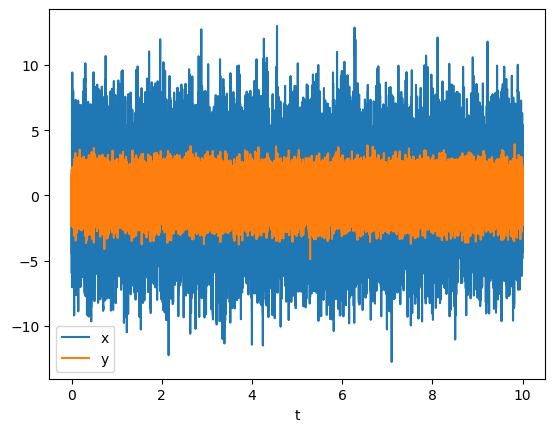

In [4]:
plt.plot(time,data[0],label="x")
plt.plot(time,data[1],label="y")
plt.xlabel("t")
plt.legend()
plt.show()

In [5]:
Y = data[0,:-1]
Z = data[1,:-1]
X = data[0,1:]

Uy, Uz, S, R = PID(X,Y,Z)
S_th = np.log2(1+alpha**2)
R_th = np.log2((1+alpha**2)/(1+alpha**4))
print("Uy:",Uy)
print("Uz:",Uz)
print("S:",S)
print("R",R)
print("S_th",S_th)
print("R_th",R_th)

Uy: 2.2351665423771725
Uz: 0
S: 0.8509293831757003
R 0.12815264027125883
S_th 0.8559896973084807
R_th 0.12819990783579507


In [7]:
d = 1000
Y_d = np.zeros((d,len(time)-d))
Z_d = np.zeros((d,len(time)-d))
X_d = data[0,d:]

for i in range(d):
    Y_d[i,:] = data[0,i:-d+i]
    Z_d[i,:] = data[1,i:-d+i]

Uy, Uz, S, R = PID(X_d,Y_d,Z_d)
S_th = np.log2(1+alpha**2)
R_th = S_th
print("S:",S)
print("R:",R)
print("S_th:",S_th)
print("R_th:",R_th)

S: 0.8651411603537507
R: 0.8563511844342756
S_th: 0.8559896973084807
R_th: 0.8559896973084807


## S  proporzionale all'identità (A(0,1)=0 ,   A(1,0)=0)

In [ ]:
time=np.linspace(0,10,1000)
data = np.zeros((2,len(time)))
A = np.random.rand(2,2)
A[0,1] = 0
A[1,0] = 0
S=np.array([[1,0],[0,1]])
for i in range(len(time)-1):
    data[:,i+1]=np.dot(A,data[:,i])+np.random.multivariate_normal(mean=[0,0],cov=S)

In [ ]:
plt.plot(time,data[0],label="x")
plt.plot(time,data[1],label="y")
plt.xlabel("t")
plt.legend()
plt.show()

In [ ]:
# slice for PID

Y = data[0,:-1]
Z = data[1,:-1]
X = data[:,1:]

Uy, Uz, S, R = PID(X,Y,Z)
print("Uy:",Uy)
print("Uz:",Uz)
print("S:",S)
print("R",R)

## S  proporzionale all'identità (A(0,1)=0)

In [ ]:
time=np.linspace(0,10,1000)
data = np.zeros((2,len(time)))
A = np.random.rand(2,2)
A[0,1] = 0
S=np.array([[1,0],[0,1]])
for i in range(len(time)-1):
    data[:,i+1]=np.dot(A,data[:,i])+np.random.multivariate_normal(mean=[0,0],cov=S)

In [ ]:
plt.plot(time,data[0],label="x")
plt.plot(time,data[1],label="y")
plt.xlabel("t")
plt.legend()
plt.show()

In [ ]:
# slice for PID

Y = data[0,:-1]
Z = data[1,:-1]
X = data[:,1:]

Uy, Uz, S, R = PID(X,Y,Z)
print("Uy:",Uy)
print("Uz:",Uz)
print("S:",S)
print("R",R)

## S  proporzionale all'identità (A(1,0)=0)

In [ ]:
time=np.linspace(0,10,1000)
data = np.zeros((2,len(time)))
A = np.random.rand(2,2)
A[1,0] = 0
S=np.array([[1,0],[0,1]])
for i in range(len(time)-1):
    data[:,i+1]=np.dot(A,data[:,i])+np.random.multivariate_normal(mean=[0,0],cov=S)
    

In [ ]:
plt.plot(time,data[0],label="x")
plt.plot(time,data[1],label="y")
plt.xlabel("t")
plt.legend()
plt.show()

In [ ]:
# slice for PID

Y = data[0,:-1]
Z = data[1,:-1]
X = data[:,1:]

Uy, Uz, S, R = PID(X,Y,Z)
print("Uy:",Uy)
print("Uz:",Uz)
print("S:",S)
print("R",R)

## S  non diagonale (A(0,1)=0 ,   A(1,0)=0)

In [ ]:
time=np.linspace(0,10,1000)
data = np.zeros((2,len(time)))
A = np.random.rand(2,2)
A[0,1] = 0
A[1,0] = 0
S=np.array([[1,0.5],[0.5,1]])
for i in range(len(time)-1):
    data[:,i+1]=np.dot(A,data[:,i])+np.random.multivariate_normal(mean=[0,0],cov=S)
    

In [ ]:
plt.plot(time,data[0],label="x")
plt.plot(time,data[1],label="y")
plt.xlabel("t")
plt.legend()
plt.show()

In [ ]:
# slice for PID

Y = data[0,:-1]
Z = data[1,:-1]
X = data[:,1:]

Uy, Uz, S, R = PID(X,Y,Z)
print("Uy:",Uy)
print("Uz:",Uz)
print("S:",S)
print("R",R)

### Error fit

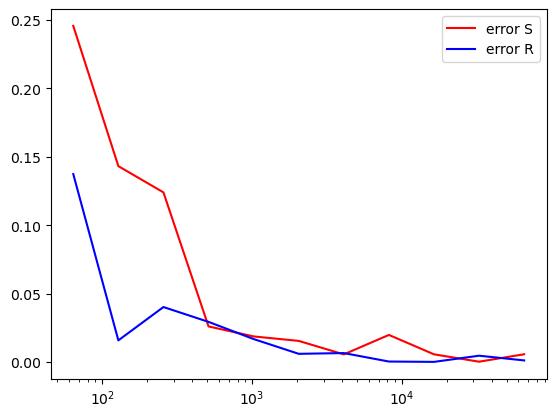

In [8]:
n_list = [2**x for x in range(6,int(np.log2(len(time)))+1)]
error_list_S = []
error_list_R = []
S_th = np.log2(1+alpha**2)
R_th = np.log2((1+alpha**2)/(1+alpha**4))   
for n in n_list:
    data_n = data[:,:n]
    Y = data_n[0,:-1]
    Z = data_n[1,:-1]
    X = data_n[0,1:]

    Uy, Uz, S, R = PID(X,Y,Z)
    error_list_S.append(abs(S_th-S))
    error_list_R.append(abs(R_th-R))
    
plt.plot(n_list,error_list_S,label = 'error S',color='red')
plt.plot(n_list,error_list_R,label = 'error R',color='blue')
plt.xscale('log')
plt.legend()

(4000,) (1000, 4000) (1000, 4000)
(9000,) (1000, 9000) (1000, 9000)
(19000,) (1000, 19000) (1000, 19000)
(39000,) (1000, 39000) (1000, 39000)
(79000,) (1000, 79000) (1000, 79000)


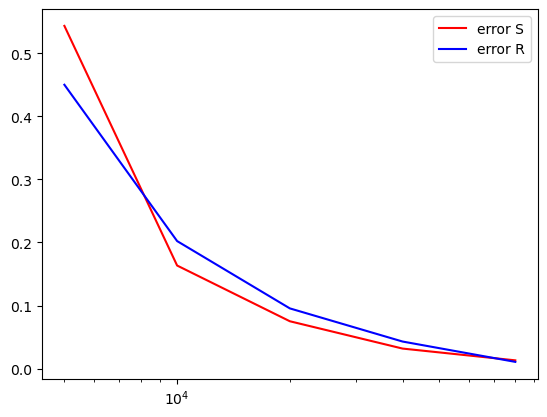

In [12]:
n_list = np.zeros(5,dtype="int")
n_list[0] = 5000
for k in range(len(n_list)-1): n_list[k+1] = 2*n_list[k]

d = 1000
error_list_S = []
error_list_R = []
S_th = np.log2(1+alpha**2)
R_th = S_th

for n in n_list:
    data_n = data[:,:n]
    Y_d = np.zeros((d,len(data_n[0])-d))
    Z_d = np.zeros((d,len(data_n[0])-d))
    X_d = data_n[0,d:]
    for i in range(d):
        Y_d[i,:] = data_n[0,i:-d+i]
        Z_d[i,:] = data_n[1,i:-d+i]

    print(np.shape(X_d),np.shape(Y_d),np.shape(Z_d))

    Uy, Uz, S, R = PID(X_d,Y_d,Z_d)
    error_list_S.append(abs(S_th-S))
    error_list_R.append(abs(R_th-R))
    
plt.plot(n_list,error_list_S,label = 'error S',color='red')
plt.plot(n_list,error_list_R,label = 'error R',color='blue')
plt.xscale('log')
plt.legend()

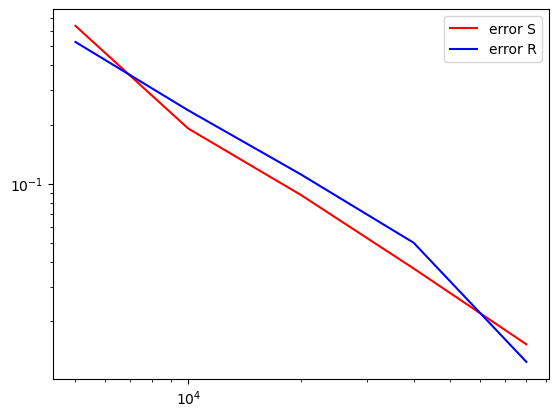

In [14]:
plt.plot(n_list,error_list_S/S_th,label = 'error S',color='red')
plt.plot(n_list,error_list_R/R_th,label = 'error R',color='blue')
plt.xscale('log')
plt.yscale('log')
plt.legend()